In [1]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
conn = 'mongodb://localhost:27018'
client = pymongo.MongoClient(conn)

In [3]:
db = client.eliteprospects

metadata = db.meta_data
player_stats = db.player_data
award_stats = db.awards_data

meta = pd.DataFrame(list(metadata.find()))
players = pd.DataFrame(list(player_stats.find()))
awards = pd.DataFrame(list(award_stats.find()))

In [20]:
meta[meta['ep_id'] == '9001']

,_id,ep_id,full_name,date_of_birth,hometown,country,youth_team,position,height,weight,shoots,status,scout_text
1,5e150cde31ffbecc369d4ad5,9001,Joffrey Lupul,"Sep 23, 1983","Fort Saskatchewan, AB, CAN",Canada,Fort Saskatchewan Rangers,RW,"6'1"" / 185 cm",212 lbs / 96 kg,R,Retired,-


In [5]:
players[players['ep_id'] == '9001']

,_id,ep_id,season,team,league,regular_gp,regular_g,regular_a,regular_pim,regular_pm,team_type,playoffs_gp,playoffs_g,playoffs_a,playoffs_pim,playoffs_pm
16,5e150cde31ffbecc369d4ad6,9001,1998-99,Fort Saskatchewan Rang. Bntm AAA,AMBHL,36,40,50,90,40,club,,-,-,-,-
17,5e150cde31ffbecc369d4adf,9001,1999-00,Fort Saskatchewan Rang. Mdgt AAA,AMHL,34,43,30,73,47,club,Playoffs,4,0,1,2
18,5e150cde31ffbecc369d4ae8,9001,2000-01,Medicine Hat Tigers,WHL,69,30,26,56,39,club,,,,,
19,5e150cde31ffbecc369d4af1,9001,2001-02,Medicine Hat Tigers,WHL,72,56,50,106,95,club,,,,,
20,5e150cde31ffbecc369d4afa,9001,2002-03,Medicine Hat Tigers,WHL,50,41,37,78,82,club,Playoffs,11,4,15,20
21,5e150cde31ffbecc369d4b03,9001,2002-03,Canada U20,WJC-20,6,2,1,3,27,international,,,,,
22,5e150cde31ffbecc369d4b0c,9001,2003-04,Anaheim Ducks,NHL,75,13,21,34,28,club,,,,,
23,5e150cde31ffbecc369d4b15,9001,2003-04,Cincinnati Mighty Ducks,AHL,3,3,2,5,2,international,,,,,
24,5e150cde31ffbecc369d4b1e,9001,2004-05,Cincinnati Mighty Ducks \n“A”,AHL,65,30,26,56,58,club,Playoffs,12,3,12,27
25,5e150cde31ffbecc369d4b27,9001,2005-06,Anaheim Ducks,NHL,81,28,25,53,48,club,Playoffs,16,9,11,31


In [21]:
awards[awards['ep_id'] == '9001']

,_id,ep_id,season,award,award_count
64,5e150cde31ffbecc369d4ad7,9001,1999-2000,AMHL Most Points,1
65,5e150cde31ffbecc369d4ad8,9001,2001-2002,CHL First All-Star Team,1
66,5e150cde31ffbecc369d4ad9,9001,2001-2002,CHL Top Prospects Game,1
67,5e150cde31ffbecc369d4ada,9001,2001-2002,WHL (East) First All-Star Team,1
68,5e150cde31ffbecc369d4adb,9001,2001-2002,WHL Most Goals,1
69,5e150cde31ffbecc369d4adc,9001,2002-2003,U20 WJC Silver Medal,1
70,5e150cde31ffbecc369d4add,9001,2004-2005,AHL Player of the Week,1
71,5e150cde31ffbecc369d4ade,9001,2011-2012,NHL All-Star Game,1
72,5e150cde31ffbecc369d4ae0,9001,1999-2000,AMHL Most Points,1
73,5e150cde31ffbecc369d4ae1,9001,2001-2002,CHL First All-Star Team,1


In [7]:
awards_grouped = awards.groupby(['ep_id', 'season']).agg({'award_count': 'sum'}).reset_index()

In [8]:
awards_grouped.sample(20)

,ep_id,season,award_count
141,24113,2009-2010,63
139,24113,2006-2007,21
232,9001,2002-2003,25
244,9040,2006-2007,32
265,9458,2016-2017,60
289,9521,2001-2002,56
258,9126,2003-2004,28
224,8906,2010-2011,50
68,12043,2012-2013,42
35,11501,2005-2006,22


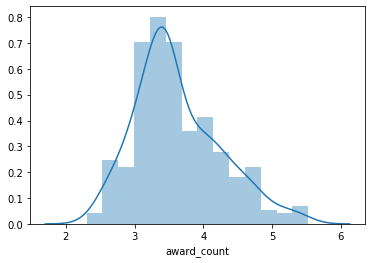

In [18]:
sns.distplot(np.log(awards_grouped['award_count']))

In [10]:
players['league'].unique()

array(['WHL', 'AHL', 'DEL', 'Liiga', 'NLB', 'ECHL', 'AMBHL', 'AMHL',
       'WJC-20', 'NHL', 'KHL', 'SHL', 'International', 'Allsvenskan',
       'EBEL', 'Hungary', 'Italy', 'DEL2', 'Denmark', 'France', 'AlpsHL',
       'Chinook HL', 'ACHW', 'Slovakia U18', 'USHL', 'WJC-18', 'NLA',
       'Czech', 'Slovakia', 'Czech Q', 'PCBHL', 'BCHL', 'NCAA', 'WCHL',
       'Russia3', 'Russia', 'USHS-MN', 'Germany2', 'Deutschland Cup',
       'Norway', 'UHL', 'Czech U18', 'Czech U20', 'Czech2', 'WHC-17',
       'International-Jr', 'Czech3', 'Germany3', 'CHL', 'EIHL', 'Italy2',
       'PIJHL', 'RAMHL', 'AJHL', 'WC', '', 'USports', 'Asia League',
       'Erste Liga', 'WHA2', 'SPHL', 'Division 1', 'RHL', 'Midget',
       'MMHL', 'CSHL-Sr.', 'SMHL', 'Slovakia U20', 'OG', 'Mestis', 'ACAC',
       'SJHL', 'FCHL', 'MJHL', 'WC D1A', 'EPIHL', 'Kazakhstan', 'HHL',
       'QVHL', 'Netherlands', 'SASHL', 'HJHL', 'LNAH', 'SWHL', 'NCHL',
       'KIJHL', 'Bantam', 'SSMHL', 'NAHL', 'SVHL', 'WCup', 'BCAHA', 'OGQ',
  

In [11]:
len(meta)

102

In [12]:
len(players)

2184